# Gradient Descent with Multiple Minima
This shows and example of the difficulties in using the gradient descent algorithm when there are multiple minima. The problem is basically that you can get caught descending into one of the minima - but is that the lowest point of the cost function (i.e., is it the lowest minima).

To investigate this, the following function is used:
$$ g(x) = x^4 - 4x^2 + 5 $$

## Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from gradient_descent import gradient_descent

In [2]:
# Create 1000 data points in the range +/2 for the x variables.
xData = np.linspace(start=-2, stop=2, num=1000)

## Cost Function $g(x)$ and Derivative Function $dg(x)$
The derivative function of $g(x)$ is:
$$ dg(x) = 4 x^3 - 8x $$

In [3]:
# Create Python functions for the cost function and derivative function:
def g(x) :
    return x**4 - 4 * x**2 + 5

def dg(x) :
    return 4 * x**3 - 8 * x

### Plot the Cost Function and the Derivative Function

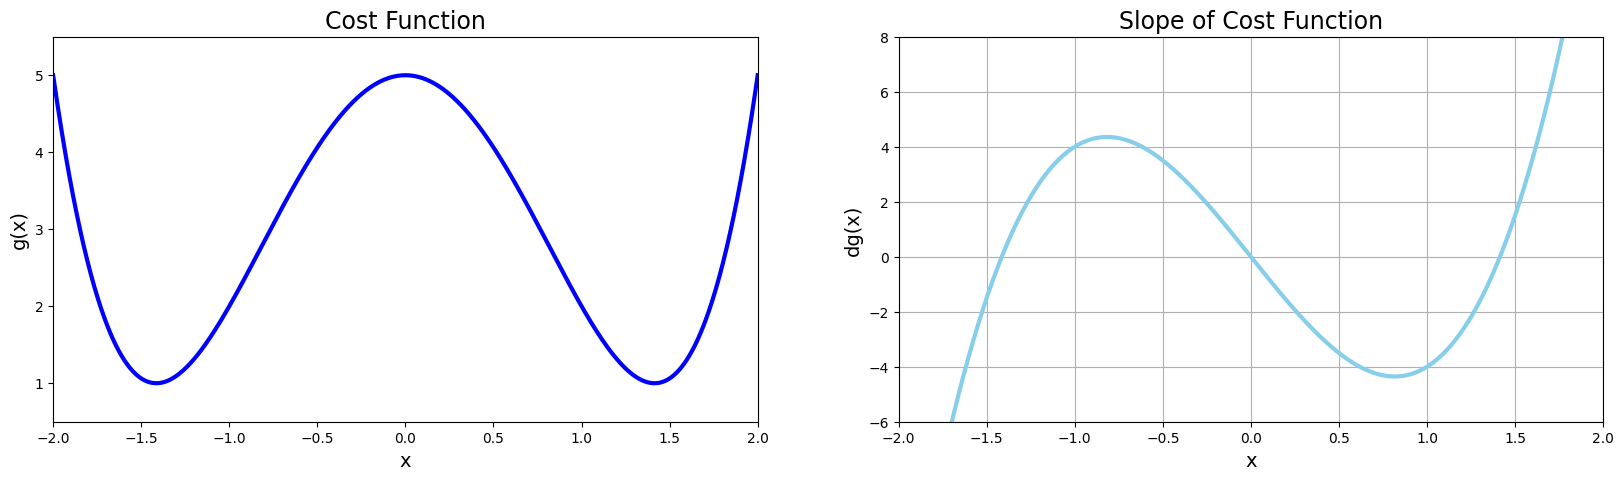

In [4]:
plt.figure(figsize=[20, 5])

# Plot 1 - Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

plt.plot(xData, g(xData), color='blue', linewidth=3)

# Plot 2 - Derivative Function
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('dg(x)', fontsize=14)
plt.grid()

plt.plot(xData, dg(xData), color='skyblue', linewidth=3)


The above figures illustrate where there might be some difficulties with the gradient descent algorithm:

1. There are two minima - with both appearing to have the same minimum value.
2. The function for the **Slope of the Cost Function** has three places where it is zero - the centre one indicating the maxima in the Cost Function where the slope of the Cost Function is also zero (not just at the two minima).

These will make it difficult for the gradient descent algorithm to determine the minima for the cost function.

## Create Python Function to Perform Gradient Descent
This is now in the file `gradient_descent.py`.

In [5]:
# def gradient_descent(derivative_function, initial_guess, multiplier=0.02, precision=0.001) :
#     new_x = initial_guess
#     x_list = []
#     slope_list = []
#
#     for n in range(500) :
#         previous_x = new_x
#         gradient = derivative_function(previous_x)
#         new_x = previous_x - multiplier * gradient
#
#         step_size = abs(new_x - previous_x)
#
#         x_list.append(new_x)
#         slope_list.append(derivative_function(new_x))
#
#         if step_size < precision :
#             break
#
#     return new_x, x_list, slope_list
#
# local_minimum, list_x, derivative_list = gradient_descent(derivative_function=dg, initial_guess=-0.5)
# print('Local minimum occurs at: ', local_minimum)
# print('Number of steps: ', len(list_x))


## Plot Cost Functions and Gradient Descent Points

Local minimum occurs at:  1.4147172871957288
Number of steps:  38


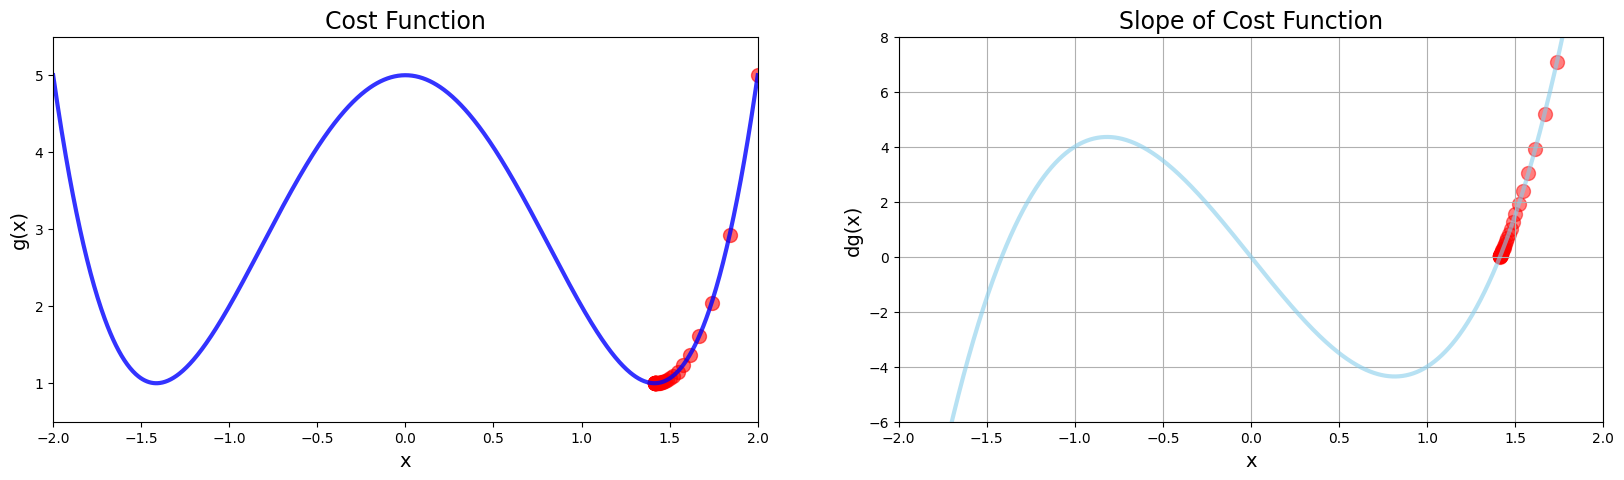

In [6]:
local_minimum, list_x, derivative_list = gradient_descent(derivative_function=dg, initial_guess=2, multiplier=0.01, precision=0.0001)
print('Local minimum occurs at: ', local_minimum)
print('Number of steps: ', len(list_x))

plt.figure(figsize=[20, 5])

# Plot 1 - Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

plt.plot(xData, g(xData), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Plot 2 - Derivative Function
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('dg(x)', fontsize=14)
plt.grid()

plt.plot(xData, dg(xData), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, derivative_list, color='red', s=100, alpha=0.5)

Changing the values used to call the gradient descent function shows how the starting position changes which minima we reach.

Also, if we start at $ x = 0 $, the algorithm stops immediately as the slope at this point is zero, and neither minima is reached as we are stuck at the local maxima.

## Impact of Learning Rage
The selection of the learning rate (or `multiplier` parameter in our gradient `descent_function()`) can have an impact on how well the effectiveness of the gradient descent algorithm.

Consider changing the learning rate to 2.5 and restricting the number of iterations to 5. Also we start at and x position of 1.9:

Local minimum occurs at:  0.39373978729066317
Number of steps:  6


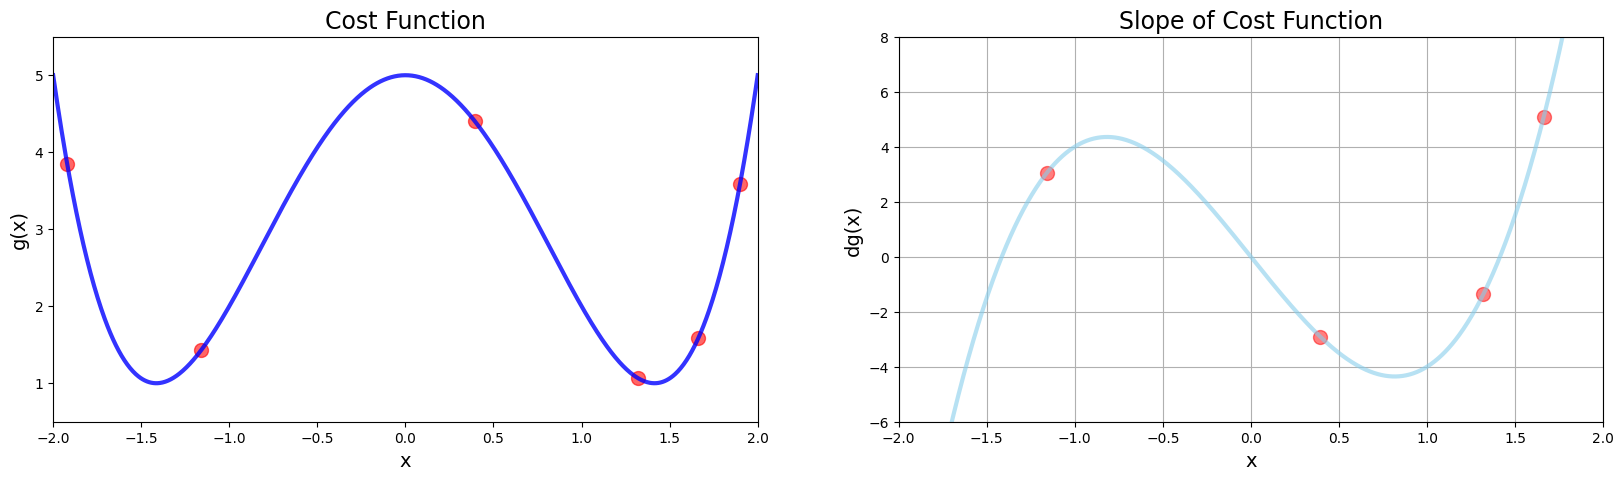

In [7]:
local_minimum, list_x, derivative_list = gradient_descent(derivative_function=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, maximum_iterations=5)
print('Local minimum occurs at: ', local_minimum)
print('Number of steps: ', len(list_x))

plt.figure(figsize=[20, 5])

# Plot 1 - Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

plt.plot(xData, g(xData), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Plot 2 - Derivative Function
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('dg(x)', fontsize=14)
plt.grid()

plt.plot(xData, dg(xData), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, derivative_list, color='red', s=100, alpha=0.5)

This shows the gradient descent does  not appear to converge to any minima and jumps around.

If we increase the number of iterations from 5 to 500, this becomes more apparent:

Local minimum occurs at:  -1.6313410224859874
Number of steps:  501


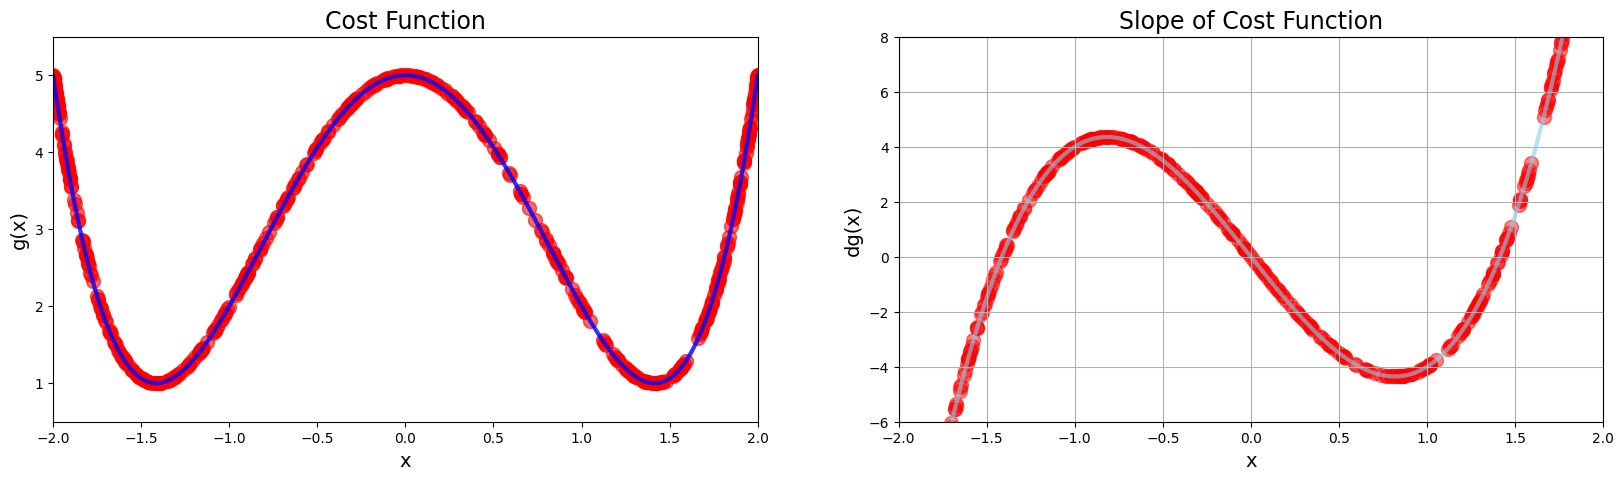

In [8]:
local_minimum, list_x, derivative_list = gradient_descent(derivative_function=dg, initial_guess=1.9, multiplier=0.25,
                                                          precision=0.0001, maximum_iterations=500)
print('Local minimum occurs at: ', local_minimum)
print('Number of steps: ', len(list_x))

plt.figure(figsize=[20, 5])

# Plot 1 - Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

plt.plot(xData, g(xData), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Plot 2 - Derivative Function
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('dg(x)', fontsize=14)
plt.grid()

plt.plot(xData, dg(xData), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, derivative_list, color='red', s=100, alpha=0.5)

This shows the algorithm never merges. The reason is the step size becomes too large, and for a cost function such as this, it will just bounce around all over the place.

Alternatively, what if we make the step size smaller the original 0.02 we used to say 0.0001

Local minimum occurs at:  1.5813132847042495
Number of steps:  501


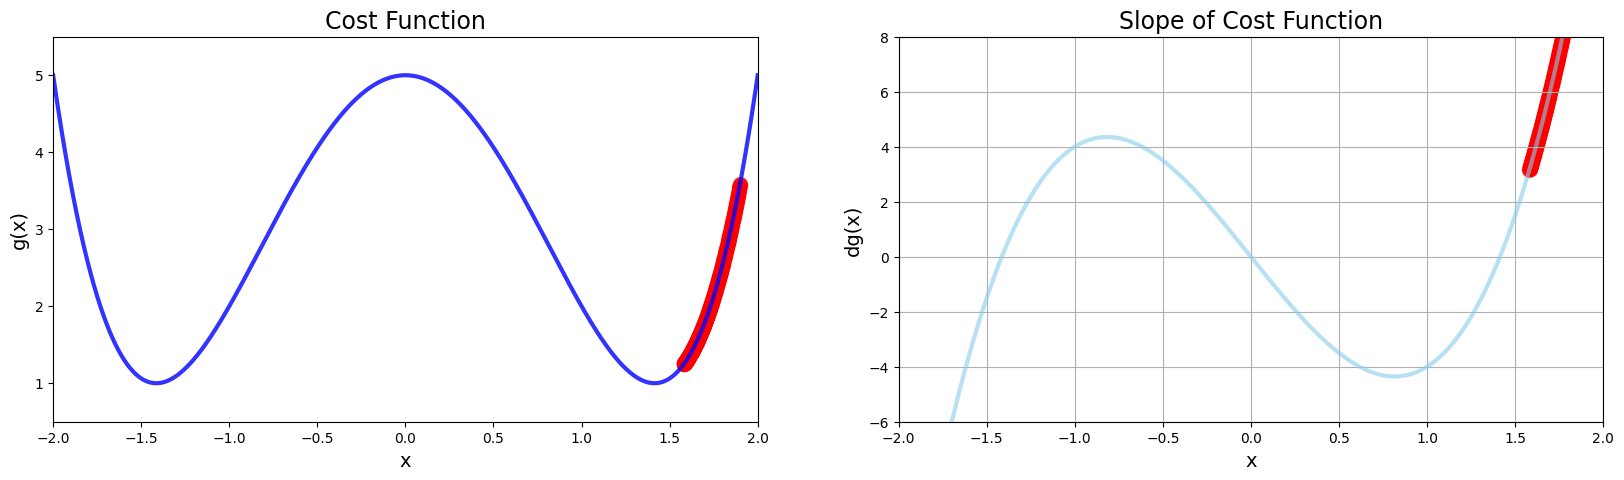

In [9]:
local_minimum, list_x, derivative_list = gradient_descent(derivative_function=dg, initial_guess=1.9, multiplier=0.0001,
                                                          precision=0.0001, maximum_iterations=500)
print('Local minimum occurs at: ', local_minimum)
print('Number of steps: ', len(list_x))

plt.figure(figsize=[20, 5])

# Plot 1 - Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

plt.plot(xData, g(xData), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Plot 2 - Derivative Function
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('dg(x)', fontsize=14)
plt.grid()

plt.plot(xData, dg(xData), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, derivative_list, color='red', s=100, alpha=0.5)

This doesn't even reach the minimum after 500 iterations.

These two examples show how the selection of the learning rate can impact how well the gradient descent algorithm works.

To further illustrate the impact of the learning rate, we can look at the value of the cost function against the number of iterations.

## Learning Rate and Cost Function

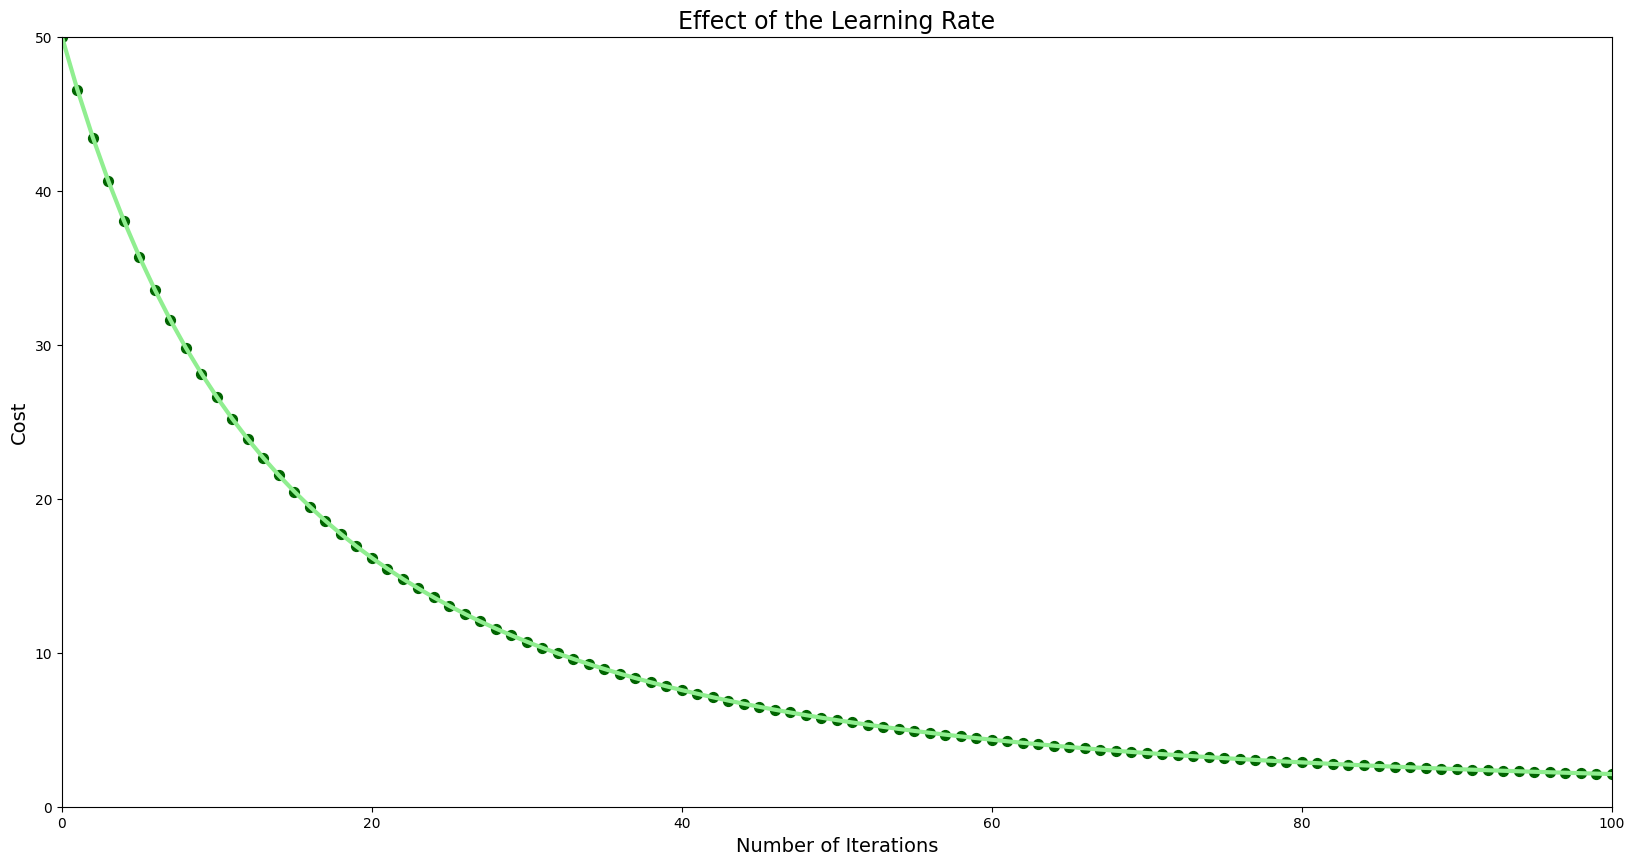

In [14]:
number_of_iterations = 100
low_gamma = gradient_descent(derivative_function=dg, initial_guess=3, multiplier=0.0005,
                                                          precision=0.0001, maximum_iterations=number_of_iterations)

# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])
plt.xlim(0, number_of_iterations)
plt.ylim(0, 50)

plt.title('Effect of the Learning Rate', fontsize=17)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Cost', fontsize=14)

# Values for charts
# For Y-axis data, convert lists to numpy arrays.
low_values = np.array(low_gamma[1])
# For X-axis, from 0 to number of iterations + 1.
iteration_list = list(range(0, number_of_iterations+1))

plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=3)
plt.scatter(iteration_list, g(low_values), color='darkgreen', s=50)

plt.show()